# Seven must know statisticl distributions and their simulations for data science

https://towardsdatascience.com/seven-must-know-statistical-distributions-and-their-simulations-for-data-science-681c5ac41e32

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext blackcellmagic
# start cell with `%%black` to format using `black`

%load_ext autoreload


# Bernoulli Distribution

1. Only 2 outcomes
2. Only one trial

PMF (probability mass function) of a r.v. x that follows the Bernoulli distribution is

\begin{equation}
  f(x) = \begin{cases}
    p,     & x = success \\
    1 - p, & x = failure
   \end{cases}
\end{equation}

In [9]:
# success and failure probabilities are different
np.random.choice(['success', 'failure'], p=(0.8, 0.2))

'success'

# Binomial distribution

Describe r.v. $x$ as the number of success in $n$ Bernoulli trials.

* The outcome distribution of $n$ identical Bernoulli distributed r.v.'s

Assumptions

1. each trial only has two outcomes (like tossing a coin);
2. there are n identical trials in total (tossing the same coin for n times);
3. each trial is independent of other trials (getting “Head” at the first trial wouldn’t affect the chance of getting “Head” at the second trial);
4. p, and 1-p are the same for all trials (the chance of getting “Head” is the same across all trials);


Two parameters - $p$, probability of success, and $n$, the number of trials.

\begin{equation}
f(x) = \begin{cases}
    \frac{n!}{x!(n - x)!}  p^x (1 - p)^{n - x}, & x = 0, 1, 2, ..., n\\
    0, & \text{otherwise}
    \end{cases}
\end{equation}

\begin{align}
E(x) &= np \\
Var(x) &= np(1-p)
\end{align}

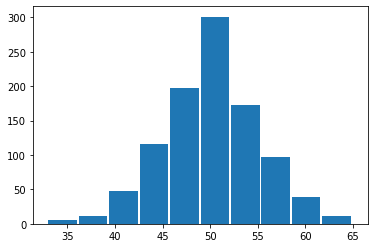

In [16]:
n = 100
p = 0.5
size = 1000

binomial = np.random.binomial(n, p, size)
plt.hist(binomial, width=3)
plt.show()

If $n = 1$, we get the Bernoulli distribution

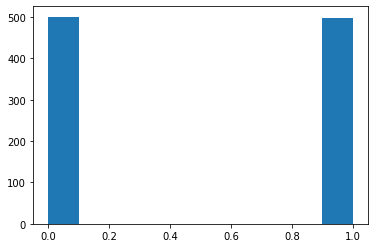

In [18]:
n = 1
p = 0.5
size = 1000

bernoulli = np.random.binomial(n, p, size)
plt.hist(bernoulli)
plt.show()

# Geometric distribution

Models the number of failures ($x$ failures) before the first success in repeated, independent, Bernoulli trials.

E.g., how many "tails" before you get a "heads".


Or, number of trials to get the first success (x - 1 failures)

Same assumptions as Binomial distribution

PMF when the random variable $x# is the number of *failures* before the first success.

\begin{align}
    f(x) &= \begin{cases}
    p (1 - p)^x, & x = 0, 1, 2, ... \\
    0, & \text{otherwise}
    \end{cases} \\
    E(x) &= \frac{1 - p}{p} \\
    Var(x) &= \frac{1 - p}{p^2}
\end{align}


PMF when the random variable $x# is the number of trials to get the first success.

\begin{align}
    f(x) &= \begin{cases}
    p (1 - p)^{x - 1}, & x = 0, 1, 2, ... \\
    0, & \text{otherwise}
    \end{cases} \\
    E(x) &= \frac{1}{p} \\
    Var(x) &= \frac{1 - p}{p^2}
\end{align}


Use Bernoulli trials to simulate the Geometric distribution.

Count thenumber of failures before the first success.

Plot number of failures.


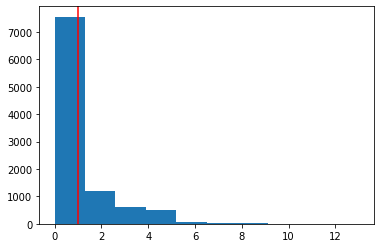

In [24]:
geometric = []
failure = 0
n = 0
p = 0.5
while n < 10000:
    result = np.random.choice(["success", "failure"], p=(p, 1 - p))
    if result == "failure":
        failure += 1
    else:
        geometric.append(failure)
        failure = 0
        n += 1
plt.hist(geometric)
plt.axvline(np.mean(geometric), color="red")
plt.show()

# Uniform distribution

A random variable whose outcomes are all equally likely to occur.

Assumptions

1. There are $n$ outcomes (discrete) or a range for the outcomes to be in (continuous)
2. All values in the outcome set are equally likely

PDF (probability density function)

\begin{align}
f(x) = \begin{cases}
    \frac{1}{b - a}, & x \in [a, b]\\
    0, & \text{otherwise}
    \end{cases}
\end{align}

\begin{align}
E(x) &= \frac{a + b}{2} \\
Var(x) &= \frac{(a - b)^2}{12}
\end{align}

To simulate, use `np.random.uniform`

In [25]:
# generate a r.v. that follows U(0, 1)
np.random.uniform(0, 1, size=10)

array([0.27368113, 0.13554894, 0.30092076, 0.07108363, 0.55337605,
       0.98350085, 0.77157597, 0.74145165, 0.47281197, 0.35733462])

(array([1037., 1047.,  983., 1009., 1004.,  954., 1016.,  970.,  994.,
         986.]),
 array([2.00003766, 2.10002146, 2.20000526, 2.29998906, 2.39997286,
        2.49995666, 2.59994046, 2.69992426, 2.79990806, 2.89989186,
        2.99987565]),
 <BarContainer object of 10 artists>)

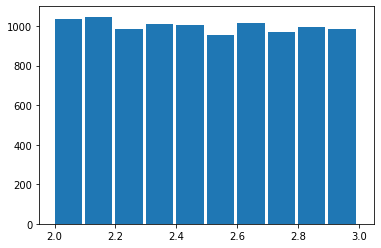

In [30]:
# Use U(0, 1) to generate U(a, b)
def unif(a, b):
    return a + (b - a) * np.random.uniform(0, 1, size=10000)

unis = unif(2, 3)
plt.hist(unis, width=0.09)

# Normal distribution

1. mean = mode = median
2. PDF is bell-shaped, symmetric at $x = \mu$

\begin{align}
f(x) &= \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}(\frac{x - \mu}{\sigma})^2}
\end{align}

To simulate, use `np.random.normal(mu, sigma, size)`

In [35]:
np.random.normal(0, 1, 10)

array([-0.08159239,  0.89518952,  0.13629034,  0.29251134, -0.2879752 ,
        0.10696408, -0.45187683, -0.37286122, -1.85217751,  0.64977182])

Or, use the Central limit theorem to simulate the normal distribution

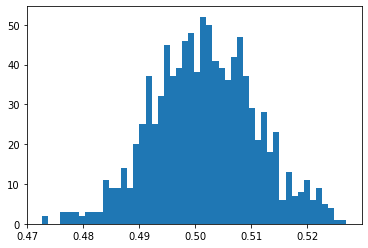

In [44]:
def clm(N, n):
    # generate a sample from any random population N
    xs = np.random.random(size=N)
    means = []

    # Take a random sub sample with size n from N
    for _ in range(n):
        idx = np.random.randint(0, N, n)
        means.append(xs[idx].mean())
        
    return plt.hist(means, bins=50)

clm(100000, 1000);

# Poisson distribution

Model the probability of a number of events occurring in a fixed interval of time or space.

E.g. the number of customers arriving in a store in an hour.

Related to the binomial distribution if you measure the number of event occurrences as the number of successes.
For example, when measuring how many cars will pass a particular street in an hour, 
the number of cars passing is a random variable that follows Poisson distribution

Assumptions

1. any successful event should not influence the outcome of other successful events (observing one car at the first second doesn’t affect the chance of observing another car the next second);
2. the probability of success p, is the same across all intervals (there is no difference between this hour with other hours to observe cars passing by);
3. the probability of success p in an interval goes to zero as the interval gets smaller (if we are discussing how many cars will pass in a millisecond, the probability is close to zero because the time is too short);


PMF (derived from PMF of binomial distribution)

\begin{equation}
f(x) = \begin{cases}
    \frac{\lambda^x}{x!} e^{-\lambda}, & x = 0, 1, 2, ... \\
    0, & \text{otherwise}
    \end{cases}
\end{equation}

Defne

\begin{align}
\lambda &= E(x) = np \quad \text{avg num of sucess in n Bernoulli trials}\\
p &= \frac{\lambda}{n} \quad \text{success probability}\\
E(x) &= Var(x) = \lambda
\end{align}

To simulate, use `np.random.poisson`

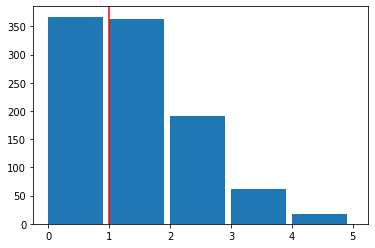

In [55]:
lam = 1
poi = np.random.poisson(lam=lam, size=1000)
plt.hist(poi, bins=max(poi), width=0.9)
plt.axvline(x=lam, c='red')

# Exponential distribution

Closely related to the Poisson distribution. It is the probability distribution of the time intervals between Poisson events.

If the number of calls a company received in an hour follows Poisson distribution, then the time interval between calls follows Exponential distribution.

CDF

\begin{align}
P(W \le \omega) &= 1 - P(W \ge \omega)\\
  &= 1 - e^{-\lambda \omega}
\end{align}


PDF (take derivative of the CDF)

\begin{align}
f(\omega) = \lambda e^{-\lambda \omega}
\end{align}

\begin{align}
E(x) &= \frac{1}{\lambda}\\
Var(x) &= \frac{1}{\lambda^2}
\end{align}

To simulate, use `np.random.exponential`

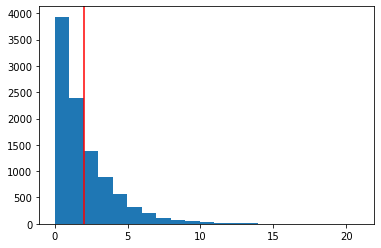

In [61]:
import math
lam = 2
exp = np.random.exponential(lam, 10000)
plt.hist(exp, bins=math.ceil(max(exp)))
plt.axvline(x=lam, c='red')

# Poisson (again)

Count how many events have occurred by time $t$

Probability that $n$ events occur by time $t$

\begin{align}
P_{0n}(t) = \frac{(\lambda t)^n}{n!}e^{-\lambda t}
\end{align}

(array([ 1.,  1.,  3.,  6.,  9., 10., 12.,  9.,  7.,  2.]),
 array([ 70. ,  75.2,  80.4,  85.6,  90.8,  96. , 101.2, 106.4, 111.6,
        116.8, 122. ]),
 <BarContainer object of 10 artists>)

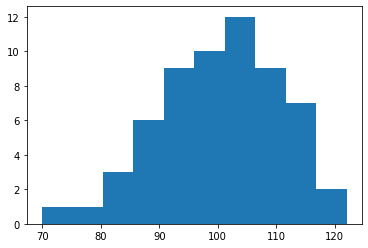

In [65]:
lam = 10 # in 60 sec
poi = np.random.poisson(lam=lam, size=60)
plt.hist(poi)


In [78]:
exp = np.random.exponential(scale=10, size=10)

exp

array([ 1.33665421,  5.62053561, 31.48852393, 28.20109456,  4.38438978,
        9.79355352,  9.05407224,  8.02116919,  1.62607495,  0.05037173])

In [79]:
sum(exp)

99.57643971091584

In [98]:
from numpy.random import default_rng

# https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generator

In [96]:
# Get a new instance of a `Generator`

rng = default_rng(seed=42)

In [99]:
rng.choice(['ab', 'cd', 'ef'], 10)

array(['cd', 'ef', 'cd', 'ef', 'cd', 'ab', 'ef', 'ef', 'ab', 'ef'],
      dtype='<U2')

In [94]:
# scale = num time units between event
# size = number of events to simulate
rng.exponential(scale=10, size=100)

array([24.04208604, 23.36189656, 23.84761   ,  2.7979429 ,  0.864374  ,
       14.52660516, 14.09960694, 31.24295957,  0.79294197, 10.46560847,
        0.70436307, 10.89023628, 17.31327353,  3.86894825, 12.31585663,
        1.53773254,  0.91577267,  3.15179202,  9.01199275,  4.1298533 ,
       12.4738595 ,  2.23576372, 18.37970264, 12.27085863,  6.55796154,
        4.17086706,  4.53319689,  0.77077147,  1.79632254,  6.85320452,
        3.88680236, 12.64206858,  7.08490627,  2.37929954,  4.61088336,
        6.41556737,  3.43833361,  3.21911221,  8.78914682,  2.96947209,
       13.33702425, 13.90863986, 10.84082928,  0.73028348, 11.34067502,
       13.54337988, 11.22039651,  2.8004912 ,  3.20936191,  1.65735907,
        3.54363513,  0.21139756,  1.67356396, 13.15056845, 39.95756271,
        5.63538092,  2.84039702,  3.97756254,  3.61342223,  1.29633603,
       10.83325135, 13.75848854, 15.07809131, 53.09882796, 21.06660235,
       16.4486584 , 10.43491482,  5.92524199,  0.44453556,  9.56

In [97]:
rng.exponential(scale=10, size=100)

array([24.04208604, 23.36189656, 23.84761   ,  2.7979429 ,  0.864374  ,
       14.52660516, 14.09960694, 31.24295957,  0.79294197, 10.46560847,
        0.70436307, 10.89023628, 17.31327353,  3.86894825, 12.31585663,
        1.53773254,  0.91577267,  3.15179202,  9.01199275,  4.1298533 ,
       12.4738595 ,  2.23576372, 18.37970264, 12.27085863,  6.55796154,
        4.17086706,  4.53319689,  0.77077147,  1.79632254,  6.85320452,
        3.88680236, 12.64206858,  7.08490627,  2.37929954,  4.61088336,
        6.41556737,  3.43833361,  3.21911221,  8.78914682,  2.96947209,
       13.33702425, 13.90863986, 10.84082928,  0.73028348, 11.34067502,
       13.54337988, 11.22039651,  2.8004912 ,  3.20936191,  1.65735907,
        3.54363513,  0.21139756,  1.67356396, 13.15056845, 39.95756271,
        5.63538092,  2.84039702,  3.97756254,  3.61342223,  1.29633603,
       10.83325135, 13.75848854, 15.07809131, 53.09882796, 21.06660235,
       16.4486584 , 10.43491482,  5.92524199,  0.44453556,  9.56

In [136]:
# lam = expected number of events over a time interval

sum(rng.poisson(lam=1000/(60*60*10), size=60*60*10))

1027

In [119]:
np.mean([sum(rng.poisson(lam=.05, size=100)) for _ in range(100)])

4.93

In [130]:
60 * 60 * 10

36000

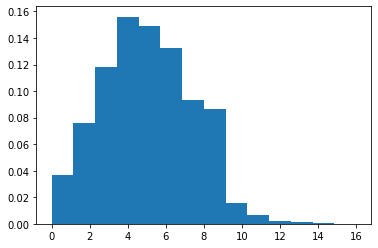

In [140]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html#numpy.random.Generator.poisson
s = rng.poisson(5, 10000)
count, bins, ignored = plt.hist(s, 14, density=True)
plt.show()